Installing & Importing Dependencies

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Importing Fashion-MNIST dataset

The images are 28 $\times$ 28 arrays, with pixel values in the range `[0, 255]`. The *labels* are an array of integers, in the range `[0, 9]`. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [6]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [7]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Exploring The Data

In [8]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


Preprocessing the Data

In [9]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

Explore the processed data

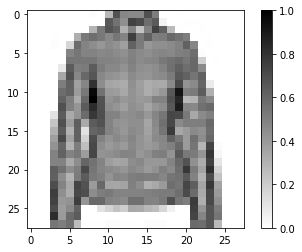

In [12]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

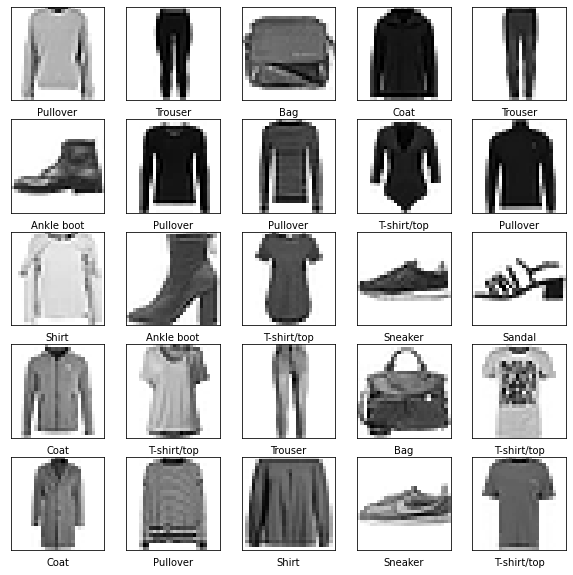

In [13]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

Building the model

- Setting up the layers

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

- Compiling the Model

In [15]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

Training the Model

In [16]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [17]:
model.fit(train_dataset, epochs=35, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/35
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4995 - accuracy: 0.8241
Epoch 2/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3661 - accuracy: 0.8685
Epoch 3/35
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3334 - accuracy: 0.8783
Epoch 4/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3064 - accuracy: 0.8877
Epoch 5/35
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.8924
Epoch 6/35
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2790 - accuracy: 0.8972
Epoch 7/35
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2683 - accuracy: 0.8983
Epoch 8/35
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2556 - accuracy: 0.9053
Epoch 9/35
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2473 - accuracy: 0.9090
Epoch 10/35
1875/1875 [==============================] - 5s 3ms/step - loss: 0.233

Evaluating Accuracy

In [20]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.4219 - accuracy: 0.8900
Accuracy on test dataset: 0.8899999856948853


Making predictions & Exploring the dataset

In [21]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [22]:
predictions.shape

(32, 10)

In [23]:
predictions[0]

array([1.4101637e-09, 5.1136029e-09, 4.5032045e-03, 1.6486954e-09,
       9.7591728e-01, 1.3726797e-12, 1.9579565e-02, 4.2703033e-12,
       1.3953377e-14, 9.3111474e-09], dtype=float32)

In [24]:
np.argmax(predictions[0])

4

In [25]:
test_labels[0]

4

In [27]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

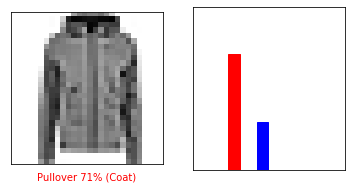

In [34]:
i = 23
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

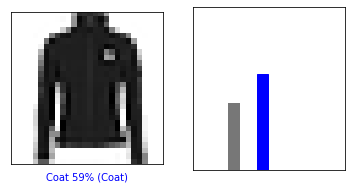

In [37]:
i = 29
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

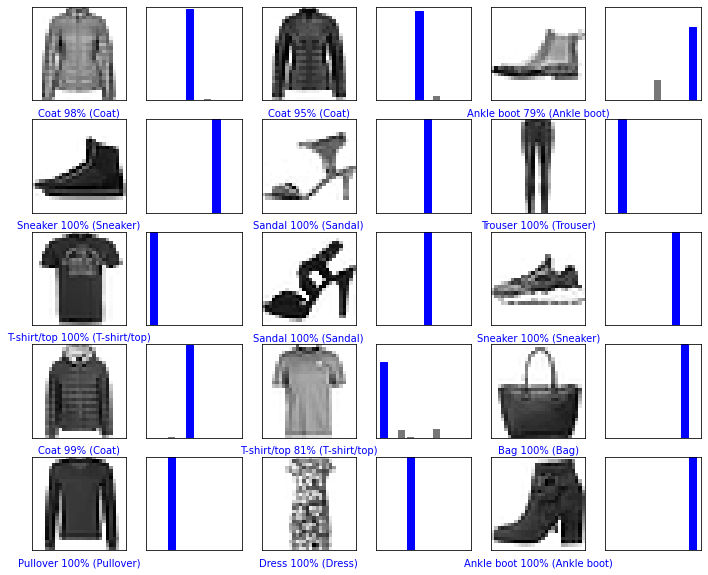

In [38]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [40]:
img = test_images[0]
print(img.shape)

(28, 28, 1)


In [41]:
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [42]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.4101608e-09 5.1136024e-09 4.5032054e-03 1.6487109e-09 9.7591716e-01
  1.3726847e-12 1.9579632e-02 4.2702868e-12 1.3953402e-14 9.3111447e-09]]


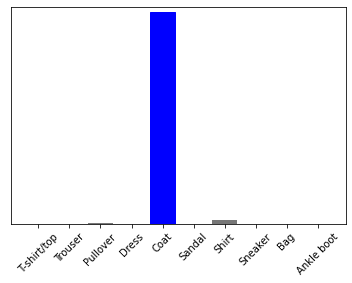

In [43]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [37]:
np.argmax(predictions_single[0])

4